## Hierarichal Clustering Implementation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

In [3]:
# Load IRIS dataset
data = load_iris()

In [4]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
data['feature_names']


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data.target)  #ignore this as we dont want output feature i.e. target variable

In [19]:
X.shape

(150, 4)

In [21]:
from sklearn.model_selection import train_test_split   
#The train_test_split function in Scikit-Learn is used to split your dataset into training and testing subsets. This is a common practice in machine learning to evaluate how well a model generalizes to new, unseen data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)   #test_sixe =0.3 means 30% dataset reserved for testing from whole dataset

## always do Feature Scaling in K-Means or Hierarichal Clustering like Standard Scaler

In [24]:
#Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  # Step 1: Initialize the scaler
X_train_scaled=sc.fit_transform(X_train) # Step 2: Fit the scaler to the training data and transform it
X_test_scaled=sc.transform(X_test)    # Step 3: Transform the test data using the already fitted scaler

In [26]:
X_train_scaled.shape

(100, 4)

In [28]:
X_train_scaled #scaled X_train 

array([[-0.13835603, -0.26550845,  0.22229072,  0.10894943],
       [ 2.14752625, -0.02631165,  1.61160773,  1.18499319],
       [-0.25866563, -0.02631165,  0.39595535,  0.37796037],
       [-0.8602136 ,  1.16967238, -1.39857913, -1.37061074],
       [ 2.26783585, -0.50470526,  1.66949594,  1.05048772],
       [-0.01804644, -0.74390206,  0.16440251, -0.29456698],
       [-0.739904  ,  0.93047557, -1.39857913, -1.37061074],
       [-0.98052319,  1.16967238, -1.45646733, -1.23610527],
       [-0.8602136 ,  1.88726279, -1.10913808, -1.1015998 ],
       [-0.98052319, -2.4182797 , -0.18292674, -0.29456698],
       [ 0.58350153, -0.74390206,  0.62750818,  0.78147678],
       [-1.22114238,  0.93047557, -1.10913808, -1.37061074],
       [-0.98052319, -0.02631165, -1.28280271, -1.37061074],
       [-0.8602136 ,  0.69127877, -1.2249145 , -0.96709433],
       [-0.25866563, -0.74390206,  0.22229072,  0.10894943],
       [-0.8602136 ,  0.93047557, -1.34069092, -1.37061074],
       [-0.13835603, -0.

### Now we have to decrease the dimensions from 4D (has total 4 features so 4D) to 2D for better  visz. of clusters in graph using DIMENSIONALITY REDUCTION (PCA)

In [32]:
## Apply the PCA
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca_scaled_X_train = pca.fit_transform(X_train_scaled)
pca_scaled_X_test = pca.transform(X_test_scaled)

In [34]:
pca_scaled_X_train.shape  #converted trained data into 2D from 4D

(100, 2)

In [36]:
pca_scaled_X_test.shape  #converted testing data into 2D from 4D

(50, 2)

In [38]:
pca_scaled_X_train

array([[ 1.80806614e-01, -2.89949359e-01],
       [ 2.75947391e+00,  7.94235451e-01],
       [ 3.17594511e-01, -9.45982904e-02],
       [-2.32440574e+00,  7.19534192e-01],
       [ 2.89034253e+00,  3.83181790e-01],
       [ 9.05159418e-02, -7.14099562e-01],
       [-2.20600792e+00,  5.37801954e-01],
       [-2.34527922e+00,  6.82952398e-01],
       [-2.16615986e+00,  1.40565078e+00],
       [-2.35861703e-01, -2.62064130e+00],
       [ 1.29215434e+00, -4.51285945e-01],
       [-2.28947676e+00,  3.72071435e-01],
       [-2.04476529e+00, -4.40595361e-01],
       [-1.88267168e+00,  2.91543549e-01],
       [ 2.27401497e-01, -7.79670305e-01],
       [-2.23538174e+00,  4.96238752e-01],
       [ 4.92558369e-02, -7.21576139e-02],
       [ 2.49347327e+00,  2.63341104e+00],
       [-2.47641430e+00, -1.62346440e-01],
       [ 5.31834309e-01, -7.89996223e-02],
       [ 1.20888081e+00, -1.13886009e+00],
       [-2.45578771e+00,  2.45460025e+00],
       [ 9.02934447e-01,  9.33884816e-02],
       [ 1.

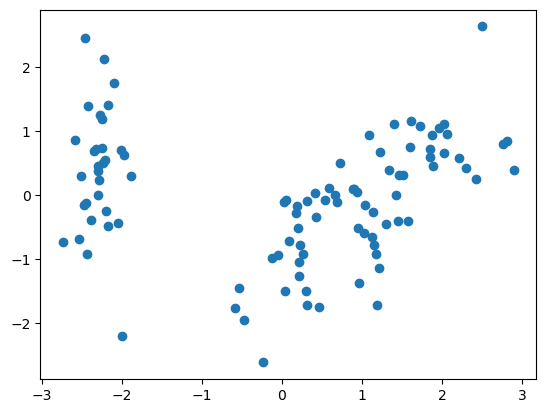

In [40]:
plt.scatter(pca_scaled_X_train[:,0],pca_scaled_X_train[:,1])

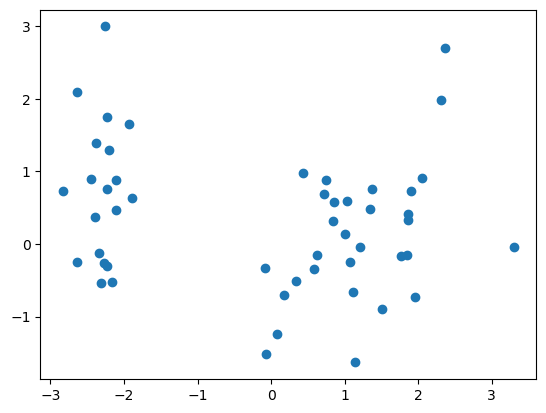

In [41]:
plt.scatter(pca_scaled_X_test[:,0],pca_scaled_X_test[:,1])

## Dendogram

We need to construct dendogram graph for Hierarichal Clustering .

The dendrogram is plotted using the Ward method of hierarchical clustering, which minimizes the variance between clusters as they are merged.
This helps visualize how clusters are formed and allows you to decide the number of clusters

Text(0, 0.5, 'Eucledian Distance')

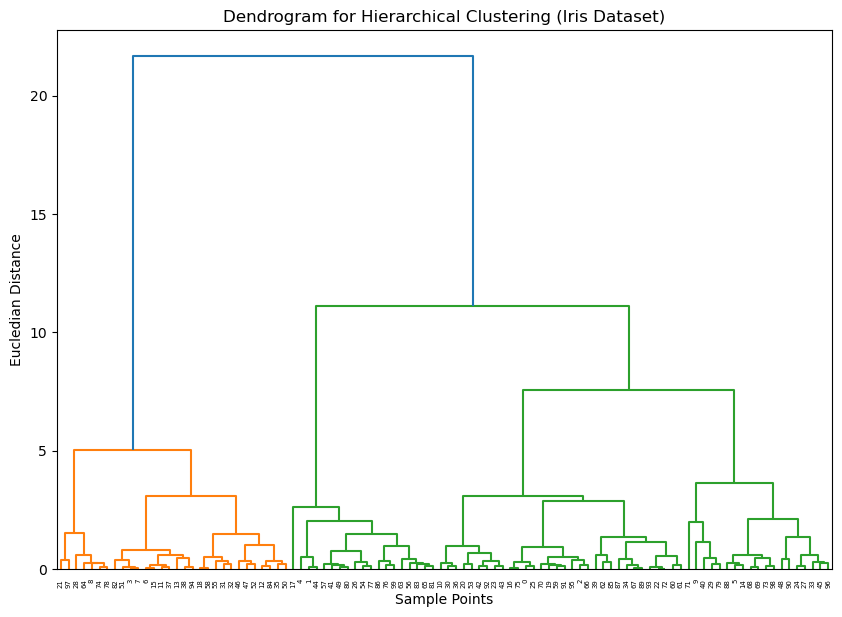

In [48]:
## To construct Dendrogram
import scipy.cluster.hierarchy as sc

##plot the dendrogram
plt.figure(figsize=(10,7))
plt.title("Dendrogram for Hierarchical Clustering (Iris Dataset)")

##create dendrogram
sc.dendrogram(sc.linkage(pca_scaled_X_train, method='ward'))  #giving ward means to tell to use Euclediean Distance
plt.xlabel('Sample Points')
plt.ylabel('Eucledian Distance')

Dendrogram: This helps you visually decide the optimal number of clusters by seeing where the largest distance between merges occurs.

In [105]:
# Apply Agglomerative Clustering (Hierarchical Clustering)
from sklearn.cluster import AgglomerativeClustering
hier_cluster=AgglomerativeClustering(n_clusters=2 ,linkage='ward')  #for ward linkage we dont need to give expilicitly euclidean distance
y_hc=hier_cluster.fit_predict(pca_scaled_X_train)

In [113]:
type(y_hc)

numpy.ndarray

In [121]:
#hier_cluster.labels_


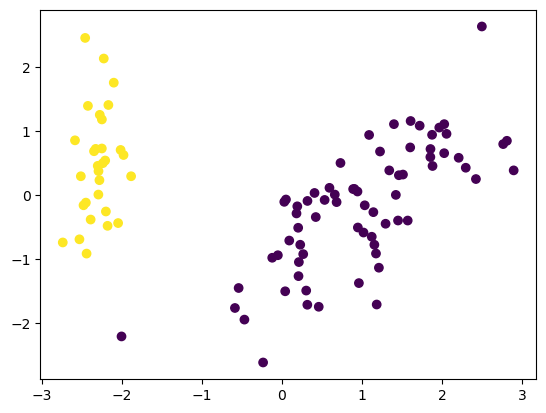

In [119]:
plt.scatter(pca_scaled_X_train[:,0],pca_scaled_X_train[:,1],c=y_hc) #I checked for trained data only

## Performance Metric

In [84]:
# Calculate Silhouette Score for trainig data X_train
from sklearn.metrics import silhouette_score  #performance metric
silhouette_coefficients=[]
#notice we start at 2 clusters for silhouette coefficient
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,linkage='ward')
    agglo.fit(X_train_scaled)
    sil_score = silhouette_score(X_train_scaled, agglo.labels_)
    silhouette_coefficients.append(sil_score)

In [86]:
silhouette_coefficients  #it ranges from -1 to 1 and best score is close to 1 or = 1

[0.5604478086733395,
 0.4715766410756801,
 0.4284080783505499,
 0.37457195131543486,
 0.36971385271677343,
 0.34850263243961277,
 0.3379142824872986,
 0.3173213285980799,
 0.32004020748495]

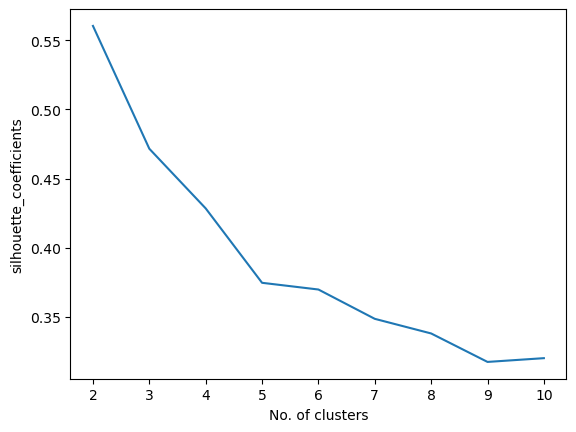

In [88]:
# plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("No. of clusters")
plt.ylabel("silhouette_coefficients")
plt.show()

so from graph we could see for K=2 we have maximum silhouette score and hence k=2 is right


The silhouette score is a measure of how similar a data point is to its own cluster compared to other clusters. You can calculate it using the silhouette_score function from the sklearn.metrics module.

In [96]:
'''
Iris Dataset: The Iris dataset is a well-known dataset containing 150 samples and 4 features of 3 different species of Iris flowers.

Scaling: Clustering algorithms like K-Means and Hierarchical Clustering work better when features are scaled properly.
Dendrogram: This helps you visually decide the optimal number of clusters by seeing where the largest distance between merges occurs.
Clustering: We cluster the data into 3 groups and plot the results.
'''

'\nIris Dataset: The Iris dataset is a well-known dataset containing 150 samples and 4 features of 3 different species of Iris flowers.\n\nScaling: Clustering algorithms like K-Means and Hierarchical Clustering work better when features are scaled properly.\nDendrogram: This helps you visually decide the optimal number of clusters by seeing where the largest distance between merges occurs.\nClustering: We cluster the data into 3 groups and plot the results.\n'